In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
df = pd.read_csv('data/sqf-2017.csv', index_col = 0)

In [42]:
df.head()

,STOP_FRISK_DATE,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,SPRINT_NUMBER,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,...,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_PREMISES_NAME,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
STOP_FRISK_ID,,,,,,,,,,,,,,,,,,,,,
1,1/16/2017,14:26:00,2017,January,Monday,Based on Self Initiated,11617924,APP,SGT,574,...,(null),(null),180 GREENWICH STREET,(null),GREENWICH STREET,982381,201750,(null),PBMS,MANHATTAN
2,1/16/2017,14:26:00,2017,January,Monday,Based on Self Initiated,11617924,APP,SGT,574,...,(null),(null),180 GREENWICH STREET,(null),GREENWICH STREET,982381,201750,(null),PBMS,MANHATTAN
3,2/8/2017,11:10:00,2017,February,Wednesday,Based on C/W on Scene,17020808555,APP,POM,863,...,C,(null),WALL STREET && BROADWAY,(null),WALL STREET,981005,197131,(null),PBMS,MANHATTAN
4,2/20/2017,11:35:00,2017,February,Monday,Based on Self Initiated,9027,APP,POM,1,...,H,(null),75 GREENE STREET,(null),GREENE STREET,984031,202796,(null),PBMS,MANHATTAN
5,2/21/2017,13:20:00,2017,February,Tuesday,Based on Radio Run,10439,APP,POM,1,...,H,2,429 WEST BROADWAY,(null),WEST BROADWAY,983894,203523,(null),PBMS,MANHATTAN


In [84]:
{k:v for k,v in zip(df.STOP_LOCATION_BORO_NAME, df.STOP_WAS_INITIATED)}

{'MANHATTAN': 'Based on Self Initiated',
 'PBMS': 'Based on Radio Run',
 '210334': 'Based on C/W on Scene',
 '208760': 'Based on Radio Run',
 '986759': 'Based on Radio Run',
 'PBMN': 'Based on Radio Run',
 'BRONX': 'Based on Radio Run',
 '(null)': 'Based on Self Initiated',
 'PBBX': 'Based on Radio Run',
 '237177': 'Based on Self Initiated',
 'BROOKLYN': 'Based on Self Initiated',
 '155070': 'Based on C/W on Scene',
 'PBBS': 'Based on Radio Run',
 'QUEENS': 'Based on C/W on Scene',
 'PBBN': 'Based on Radio Run',
 '190241': 'Based on Radio Run',
 '208169': 'Based on Radio Run',
 'STATEN IS': 'Based on Radio Run',
 'PBSI': 'Based on Radio Run'}

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11629 entries, 1 to 11629
Data columns (total 85 columns):
STOP_FRISK_DATE                                                 11629 non-null object
STOP_FRISK_TIME                                                 11624 non-null object
YEAR2                                                           11629 non-null int64
MONTH2                                                          11629 non-null object
DAY2                                                            11629 non-null object
STOP_WAS_INITIATED                                              11629 non-null object
SPRINT_NUMBER                                                   11202 non-null object
RECORD_STATUS_CODE                                              11629 non-null object
ISSUING_OFFICER_RANK                                            11629 non-null object
ISSUING_OFFICER_COMMAND_CODE                                    11629 non-null int64
SUPERVISING_OFFICER_RANK         

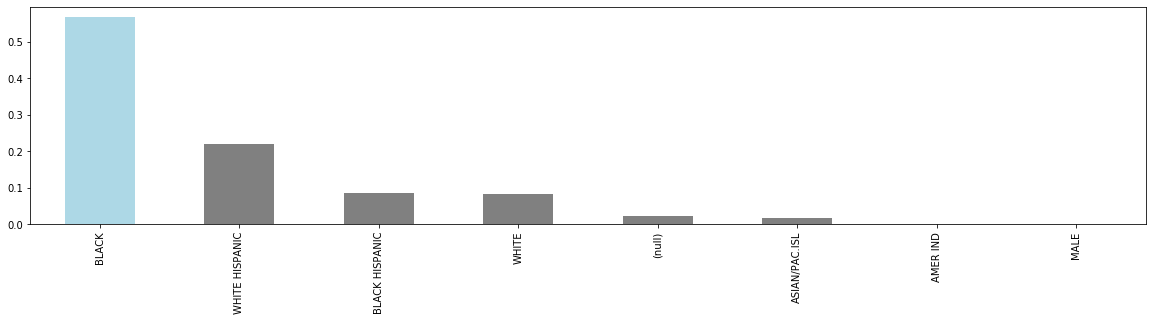

In [56]:
df['SUSPECT_RACE_DESCRIPTION'].value_counts(normalize = True).plot(kind = 'bar', figsize = (20, 4), color = ['lightblue'] +['grey']*7)

In [69]:
df['STOP_LOCATION_BORO_NAME'].value_counts()

BROOKLYN     3328
MANHATTAN    2771
BRONX        2473
QUEENS       2079
STATEN IS     546
(null)        410
PBBX            5
PBMN            3
PBBN            3
208760          2
986759          1
237177          1
210334          1
208169          1
190241          1
PBBS            1
155070          1
PBMS            1
PBSI            1
Name: STOP_LOCATION_BORO_NAME, dtype: int64

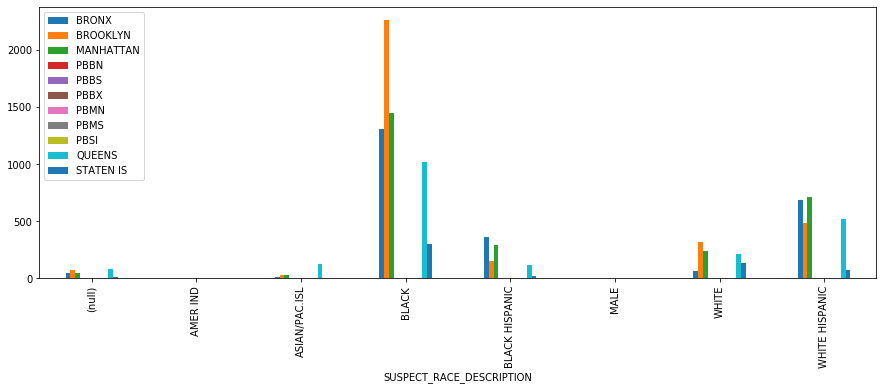

In [76]:
pd.crosstab(df.SUSPECT_RACE_DESCRIPTION, df.STOP_LOCATION_BORO_NAME).iloc[:, 8:].plot(kind = 'bar', figsize = (15, 5))
plt.legend(loc = 'upper left')

In [ ]:
# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
    # change the bar colors to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
# make one bar, the python bar, a contrasting color
bars[0].set_color('#1F77B4')

# direct label each bar with Y axis values
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())) + '%', 
                 ha='center', color='w', fontsize=11)
    
    
# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.8)
plt.ylabel('% Popularity', alpha=0.8)
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

In [31]:
pd.crosstab(df.Gender, df.Student)

Student,No,Yes
Gender,,
Male,177,16
Female,183,24


In [33]:
pd.crosstab([df.Gender, df.Married], df.Student)

Student          No  Yes
Gender Married          
 Male  No        67    9
       Yes      110    7
Female No        68   11
       Yes      115   13